In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key


# Incorporated citipy to determine city based on latitude and longitude
csv_path = "Geocode_LA.csv"
LA_df = pd.read_csv(csv_path)

LA_df.head()






,business_id,name,address,city,state,postal_code,latitude,longitude,phone_number,Score,Violations,Geocode
0,PR0000572,BASKIN ROBBINS,6700 LAUREL CANYON BLVD,NORTH HOLLYWOOD,CA,91606,34.192320,-118.396314,NaN,98.0,Standard Not Met: Toilet facilities: properly ...,6.037123e+09
1,PR0002351,AZUSA NATIONAL LITTLE LEAGUE,533 N ROCKVALE AVE,AZUSA,CA,91702,34.130445,-117.896398,NaN,95.0,Standard Not Met: Proper hot and cold holding ...,6.037404e+09
2,PR0003203,AMC CENTURY CITY 15 LEVEL 3,10250 SANTA MONICA BLVD # 2000,LOS ANGELES,CA,90067,34.060036,-118.419883,NaN,99.0,"Standard Not Met: Floors, walls and ceilings: ...",6.037268e+09
3,PR0003940,ARCLIGHT HOLLYWOOD,6360 W SUNSET BLVD,LOS ANGELES,CA,90028,34.097740,-118.327820,323-464-1465,98.0,Standard Not Met: Plumbing: Plumbing in good r...,6.037191e+09
4,PR0004579,BASKIN ROBBINS #3075,23432 LYONS AVE,NEWHALL,CA,91321,34.379486,-118.543167,NaN,96.0,Standard Not Met: Equipment/Utensils - approve...,6.037920e+09


In [2]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [4]:
LA_df["Geocode"] = ""

In [3]:
LA_df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,phone_number,Score,Violations,Geocode
0,PR0000572,BASKIN ROBBINS,6700 LAUREL CANYON BLVD,NORTH HOLLYWOOD,CA,91606,34.192320,-118.396314,NaN,98.0,Standard Not Met: Toilet facilities: properly ...,6.037123e+09
1,PR0002351,AZUSA NATIONAL LITTLE LEAGUE,533 N ROCKVALE AVE,AZUSA,CA,91702,34.130445,-117.896398,NaN,95.0,Standard Not Met: Proper hot and cold holding ...,6.037404e+09
2,PR0003203,AMC CENTURY CITY 15 LEVEL 3,10250 SANTA MONICA BLVD # 2000,LOS ANGELES,CA,90067,34.060036,-118.419883,NaN,99.0,"Standard Not Met: Floors, walls and ceilings: ...",6.037268e+09
3,PR0003940,ARCLIGHT HOLLYWOOD,6360 W SUNSET BLVD,LOS ANGELES,CA,90028,34.097740,-118.327820,323-464-1465,98.0,Standard Not Met: Plumbing: Plumbing in good r...,6.037191e+09
4,PR0004579,BASKIN ROBBINS #3075,23432 LYONS AVE,NEWHALL,CA,91321,34.379486,-118.543167,NaN,96.0,Standard Not Met: Equipment/Utensils - approve...,6.037920e+09


In [6]:
import requests
response = requests.get('https://geo.fcc.gov/api/census/block/find?latitude=' + "34.1923" +'&longitude='+ "-118.396" + '&showall=true&format=json')

In [7]:
print(response.text)

{"Block":{"FIPS":"060371232042003","bbox":[-118.396513,34.192122,-118.395388,34.193936]},"County":{"FIPS":"06037","name":"Los Angeles"},"State":{"FIPS":"06","code":"CA","name":"California"},"status":"OK","executionTime":"0"}


In [8]:
response.json()['Block']['FIPS']

'060371232042003'

In [8]:
import requests

xx = 0

for index, row in LA_df.iterrows():
    try:
        latVar, lonVar = str(row['latitude']), str(row['longitude'])
        response = requests.get('https://geo.fcc.gov/api/census/block/find?latitude=' + latVar +'&longitude='+ lonVar + '&showall=true&format=json')
    #     print(response.json()['Block']['FIPS'][0:11])

        # cut off the last digits that you don't want
        fips = response.json()['Block']['FIPS'][0:11]
        # add to the new column
        LA_df.iloc[index, LA_df.columns.get_loc('Geocode')] = fips

        xx+=1

        if (xx % 10 == 0):
            print(xx)
    
    except KeyError:
        print(row)
    
#response = requests.get('https://geo.fcc.gov/api/census/block/find?latitude=' + latVar +'&longitude='+ lonVar + '&showall=true&format=json')



10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990
1000
1010
1020
1030
1040
1050
1060
1070
1080
1090
1100
1110
1120
1130
1140
1150
1160
1170
1180
1190
1200
1210
1220
1230
1240
1250
1260
1270
1280
1290
1300
1310
1320
1330
1340
1350
1360
1370
1380
1390
1400
1410
1420
1430
1440
1450
1460
1470
1480
1490
1500
1510
1520
1530
1540
1550
1560
1570
1580
1590
1600
1610
1620
1630
1640
1650
1660
1670
1680
1690
1700
1710
1720
1730
1740
1750
1760
1770
1780
1790
1800
1810
1820
1830
1840
1850
1860
1870
1880
1890
1900
1910
1920
1930
1940
1950
business_id                   PR0221399
name                 BLUE BOTTLE COFFEE
address         20929 VENTURA BLVD # 26
city         

12880
12890
12900
12910
12920
12930
12940
12950
12960
12970
12980
12990
13000
13010
13020
13030
13040
13050
13060
13070
13080
13090
13100
13110
13120
13130
13140
13150
13160
13170
13180
13190
13200
13210
13220
13230
13240
13250
13260
13270
13280
13290
13300
13310
13320
13330
13340
13350
13360
13370
13380
13390
13400
13410
13420
13430
13440
13450
13460
13470
13480
13490
13500
13510
13520
13530
13540
13550
13560
13570
13580
13590
13600
13610
13620
13630
13640
13650
13660
13670
13680
13690
13700
13710
13720
13730
13740
13750
13760
13770
13780
13790
13800
13810
13820
13830
13840
13850
13860
13870
13880
13890
13900
13910
13920
13930
13940
13950
13960
13970
13980
13990
14000
14010
14020
14030
14040
14050
14060
14070
14080
14090
14100
14110
14120
14130
14140
14150
14160
14170
14180
14190
14200
14210
14220
14230
14240
14250
14260
14270
14280
14290
14300
14310
14320
14330
14340
14350
14360
14370
14380
14390
14400
14410
14420
14430
14440
14450
14460
14470
14480
14490
14500
14510
14520
14530
1454

21450
21460
21470
21480
21490
21500
21510
21520
21530
21540
21550
21560
21570
21580
21590
21600
21610
21620
21630
21640
21650
21660
21670
21680
21690
21700
21710
21720
21730
21740
21750
21760
21770
21780
21790
21800
21810
21820
21830
21840
21850
21860
21870
21880
21890
21900
21910
21920
21930
21940
21950
21960
21970
21980
21990
22000
22010
22020
22030
22040
22050
22060
22070
22080
22090
22100
22110
22120
22130
22140
22150
22160
22170
22180
22190
22200
22210
22220
22230
22240
22250
22260
22270
22280
22290
22300
22310
22320
22330
22340
22350
22360
22370
22380
22390
22400
22410
22420
22430
22440
22450
22460
22470
22480
22490
22500
22510
22520
22530
22540
22550
22560
22570
22580
22590
22600
22610
22620
22630
22640
22650
22660
22670
22680
22690
22700
22710
22720
22730
22740
22750
22760
22770
22780
22790
22800
22810
22820
22830
22840
22850
22860
22870
22880
22890
22900
22910
22920
22930
22940
22950
22960
22970
22980
22990
23000
23010
23020
23030
23040
23050
23060
23070
23080
23090
23100
2311

In [12]:
LA_df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,phone_number,Score,Violations,Geocode
0,PR0000572,BASKIN ROBBINS,6700 LAUREL CANYON BLVD,NORTH HOLLYWOOD,CA,91606,34.192320,-118.396314,NaN,98.0,Standard Not Met: Toilet facilities: properly ...,6.037123e+09
1,PR0002351,AZUSA NATIONAL LITTLE LEAGUE,533 N ROCKVALE AVE,AZUSA,CA,91702,34.130445,-117.896398,NaN,95.0,Standard Not Met: Proper hot and cold holding ...,6.037404e+09
2,PR0003203,AMC CENTURY CITY 15 LEVEL 3,10250 SANTA MONICA BLVD # 2000,LOS ANGELES,CA,90067,34.060036,-118.419883,NaN,99.0,"Standard Not Met: Floors, walls and ceilings: ...",6.037268e+09
3,PR0003940,ARCLIGHT HOLLYWOOD,6360 W SUNSET BLVD,LOS ANGELES,CA,90028,34.097740,-118.327820,323-464-1465,98.0,Standard Not Met: Plumbing: Plumbing in good r...,6.037191e+09
4,PR0004579,BASKIN ROBBINS #3075,23432 LYONS AVE,NEWHALL,CA,91321,34.379486,-118.543167,NaN,96.0,Standard Not Met: Equipment/Utensils - approve...,6.037920e+09


In [10]:
LA_df.head(100)

,business_id,name,address,city,state,postal_code,latitude,longitude,phone_number,Score,Violations,Geocode
0,PR0000572,BASKIN ROBBINS,6700 LAUREL CANYON BLVD,NORTH HOLLYWOOD,CA,91606,34.192320,-118.396314,NaN,98.0,Standard Not Met: Toilet facilities: properly ...,06037123204
1,PR0002351,AZUSA NATIONAL LITTLE LEAGUE,533 N ROCKVALE AVE,AZUSA,CA,91702,34.130445,-117.896398,NaN,95.0,Standard Not Met: Proper hot and cold holding ...,06037404201
2,PR0003203,AMC CENTURY CITY 15 LEVEL 3,10250 SANTA MONICA BLVD # 2000,LOS ANGELES,CA,90067,34.060036,-118.419883,NaN,99.0,"Standard Not Met: Floors, walls and ceilings: ...",06037267901
3,PR0003940,ARCLIGHT HOLLYWOOD,6360 W SUNSET BLVD,LOS ANGELES,CA,90028,34.097740,-118.327820,323-464-1465,98.0,Standard Not Met: Plumbing: Plumbing in good r...,06037190802
4,PR0004579,BASKIN ROBBINS #3075,23432 LYONS AVE,NEWHALL,CA,91321,34.379486,-118.543167,NaN,96.0,Standard Not Met: Equipment/Utensils - approve...,06037920312
5,PR0005248,BARNES & NOBLE #2303,210 AMERICANA WAY,GLENDALE,CA,91210,34.143485,-118.256648,NaN,94.0,Standard Not Met: Equipment/Utensils - approve...,06037302301
6,PR0005573,STARBUCKS INSIDE RALPH'S #289,5601 WILSHIRE BLVD,LOS ANGELES,CA,90036,34.062522,-118.350607,NaN,99.0,Standard Not Met: Nonfood-contact surfaces cle...,06037215101
7,PR0005730,CENTURY THEATER,12827 VICTORY BLVD,NORTH HOLLYWOOD,CA,91606,34.186838,-118.412688,NaN,99.0,Standard Not Met: Nonfood-contact surfaces cle...,06037123700
8,PR0006796,INDIGO HOUSE,12512 W WASHINGTON BLVD,LOS ANGELES,CA,90066,33.996532,-118.430575,310-397-9400,100.0,Standard Not Met: Warewashing facilities: Adeq...,06037702803
9,PR0007829,BASKIN ROBBINS 31 FLAVORS,6040 RESEDA BLVD,TARZANA,CA,91356,34.179737,-118.535811,NaN,95.0,Standard Not Met: Food safety certification,06037139303


In [4]:
csv_path = "incomedata.csv"
income_df = pd.read_csv(csv_path)

income_df.head()

,Id,Geocode,Geography,HouseholdsTotal,Households; Margin of Error; Total,Families; Estimate; Total,Families; Margin of Error; Total,Married-couple families; Estimate; Total,Married-couple families; Margin of Error; Total,Nonfamily households; Estimate; Total,...,Nonfamily households; Estimate; PERCENT ALLOCATED - Family income in the past 12 months,Nonfamily households; Margin of Error; PERCENT ALLOCATED - Family income in the past 12 months,Households; Estimate; PERCENT ALLOCATED - Nonfamily income in the past 12 months,Households; Margin of Error; PERCENT ALLOCATED - Nonfamily income in the past 12 months,Families; Estimate; PERCENT ALLOCATED - Nonfamily income in the past 12 months,Families; Margin of Error; PERCENT ALLOCATED - Nonfamily income in the past 12 months,Married-couple families; Estimate; PERCENT ALLOCATED - Nonfamily income in the past 12 months,Married-couple families; Margin of Error; PERCENT ALLOCATED - Nonfamily income in the past 12 months,Nonfamily households; Estimate; PERCENT ALLOCATED - Nonfamily income in the past 12 months,Nonfamily households; Margin of Error; PERCENT ALLOCATED - Nonfamily income in the past 12 months
0,1400000US06037101110,6037101110,"Census Tract 1011.10, Los Angeles County, Cali...",1617,72,1075,130,724,142,542,...,(X),(X),(X),(X),(X),(X),(X),(X),45.9,(X)
1,1400000US06037101122,6037101122,"Census Tract 1011.22, Los Angeles County, Cali...",1217,81,866,105,759,105,351,...,(X),(X),(X),(X),(X),(X),(X),(X),48.4,(X)
2,1400000US06037101210,6037101210,"Census Tract 1012.10, Los Angeles County, Cali...",2330,81,1428,159,855,167,902,...,(X),(X),(X),(X),(X),(X),(X),(X),42.1,(X)
3,1400000US06037101220,6037101220,"Census Tract 1012.20, Los Angeles County, Cali...",1257,61,804,98,559,102,453,...,(X),(X),(X),(X),(X),(X),(X),(X),29.6,(X)
4,1400000US06037101300,6037101300,"Census Tract 1013, Los Angeles County, California",1447,70,1049,100,814,114,398,...,(X),(X),(X),(X),(X),(X),(X),(X),40.7,(X)


In [5]:
income_df['Geocode']=income_df['Geocode'].astype(int)

In [6]:
df_left = pd.merge(LA_df, income_df, on='Geocode', how='left')

In [7]:
df_left.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,phone_number,Score,...,Nonfamily households; Estimate; PERCENT ALLOCATED - Family income in the past 12 months,Nonfamily households; Margin of Error; PERCENT ALLOCATED - Family income in the past 12 months,Households; Estimate; PERCENT ALLOCATED - Nonfamily income in the past 12 months,Households; Margin of Error; PERCENT ALLOCATED - Nonfamily income in the past 12 months,Families; Estimate; PERCENT ALLOCATED - Nonfamily income in the past 12 months,Families; Margin of Error; PERCENT ALLOCATED - Nonfamily income in the past 12 months,Married-couple families; Estimate; PERCENT ALLOCATED - Nonfamily income in the past 12 months,Married-couple families; Margin of Error; PERCENT ALLOCATED - Nonfamily income in the past 12 months,Nonfamily households; Estimate; PERCENT ALLOCATED - Nonfamily income in the past 12 months,Nonfamily households; Margin of Error; PERCENT ALLOCATED - Nonfamily income in the past 12 months
0,PR0000572,BASKIN ROBBINS,6700 LAUREL CANYON BLVD,NORTH HOLLYWOOD,CA,91606,34.192320,-118.396314,NaN,98.0,...,(X),(X),(X),(X),(X),(X),(X),(X),50,(X)
1,PR0002351,AZUSA NATIONAL LITTLE LEAGUE,533 N ROCKVALE AVE,AZUSA,CA,91702,34.130445,-117.896398,NaN,95.0,...,(X),(X),(X),(X),(X),(X),(X),(X),30.4,(X)
2,PR0003203,AMC CENTURY CITY 15 LEVEL 3,10250 SANTA MONICA BLVD # 2000,LOS ANGELES,CA,90067,34.060036,-118.419883,NaN,99.0,...,(X),(X),(X),(X),(X),(X),(X),(X),46.9,(X)
3,PR0003940,ARCLIGHT HOLLYWOOD,6360 W SUNSET BLVD,LOS ANGELES,CA,90028,34.097740,-118.327820,323-464-1465,98.0,...,(X),(X),(X),(X),(X),(X),(X),(X),35.2,(X)
4,PR0004579,BASKIN ROBBINS #3075,23432 LYONS AVE,NEWHALL,CA,91321,34.379486,-118.543167,NaN,96.0,...,(X),(X),(X),(X),(X),(X),(X),(X),30.6,(X)


In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [9]:
df_left.columns

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'phone_number', 'Score',
       ...
       'Nonfamily households; Estimate; PERCENT ALLOCATED - Family income in the past 12 months',
       'Nonfamily households; Margin of Error; PERCENT ALLOCATED - Family income in the past 12 months',
       'Households; Estimate; PERCENT ALLOCATED - Nonfamily income in the past 12 months',
       'Households; Margin of Error; PERCENT ALLOCATED - Nonfamily income in the past 12 months',
       'Families; Estimate; PERCENT ALLOCATED - Nonfamily income in the past 12 months',
       'Families; Margin of Error; PERCENT ALLOCATED - Nonfamily income in the past 12 months',
       'Married-couple families; Estimate; PERCENT ALLOCATED - Nonfamily income in the past 12 months',
       'Married-couple families; Margin of Error; PERCENT ALLOCATED - Nonfamily income in the past 12 months',
       'Nonfamily households; Estimate; PERCENT ALLOCATED - Nonfami

In [10]:
# Dependencies
import pandas as pd
import numpy as np
import statsmodels.api as sm
import pylab as pl
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
from scipy import stats

import seaborn as sns
# Store filepath in a variable

In [11]:
X = df_left["households_mean_income_dollars"].values.reshape(-1, 1)
y = df_left["Score"].values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

Shape:  (29282, 1) (29282, 1)


TypeError: unhashable type: 'numpy.ndarray'

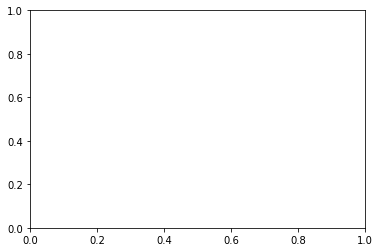

In [12]:
plt.scatter(X, y)
plt.xlabel("Average Income")
plt.ylabel("Score")

In [30]:
df_left['households_mean_income_dollars']=df_left['households_mean_income_dollars'].astype(int)

ValueError: invalid literal for int() with base 10: '-'

In [13]:
csv_path = "LA_FILTERED_MEAN_INCOME.csv"
LA_geo_df = pd.read_csv(csv_path)

LA_geo_df.head()


,Geocode,business_id,name,address,city,state,postal_code,latitude,longitude,Score,Income
0,6037123204,PR0000572,BASKIN ROBBINS,6700 LAUREL CANYON BLVD,NORTH HOLLYWOOD,CA,91606,34.192320,-118.396314,98,46932
1,6037267901,PR0003203,AMC CENTURY CITY 15 LEVEL 3,10250 SANTA MONICA BLVD # 2000,LOS ANGELES,CA,90067,34.060036,-118.419883,99,246237
2,6037190802,PR0003940,ARCLIGHT HOLLYWOOD,6360 W SUNSET BLVD,LOS ANGELES,CA,90028,34.097740,-118.327820,98,46965
3,6037920312,PR0004579,BASKIN ROBBINS #3075,23432 LYONS AVE,NEWHALL,CA,91321,34.379486,-118.543167,96,117619
4,6037302301,PR0005248,BARNES & NOBLE #2303,210 AMERICANA WAY,GLENDALE,CA,91210,34.143485,-118.256648,94,96588


In [17]:
X = LA_geo_df["Income"].values.reshape(-1, 1)
y = LA_geo_df["Score"].values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

Shape:  (26982, 1) (26982, 1)


/anaconda3/envs/PythonData/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


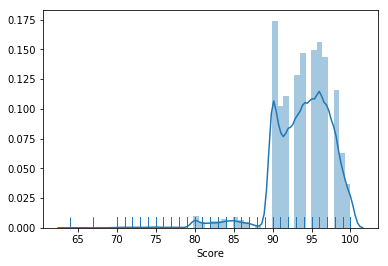

In [54]:
sns.distplot(LA_geo_df["Score"], hist=True, rug=True)
plt.savefig("Histo_Kernel_Score.png")


/anaconda3/envs/PythonData/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


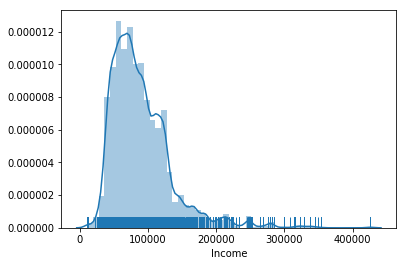

In [55]:
sns.distplot(LA_geo_df["Income"], hist=True, rug=True)
plt.savefig("Histo_Kernel_Income.png")


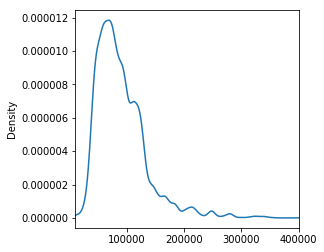

In [50]:
LA_geo_df["Income"].plot(kind="density",  # Create density plot
                      figsize=(4,4),    # Set figure size
                      xlim= (10000, 400000))      # Limit x axis values

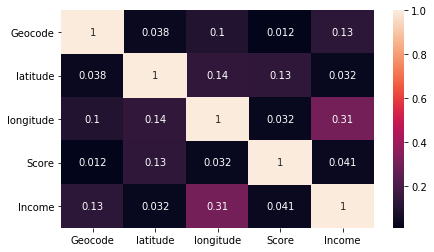

In [52]:
correlationMatrix = LA_geo_df.corr().abs()

plt.subplots(figsize=(7, 4))
sns.heatmap(correlationMatrix,annot=True)

# Mask unimportant features
sns.heatmap(correlationMatrix, mask=correlationMatrix < 1, cbar=False)
plt.show()
#plt.savefig("Correlation1_Table.png")


Text(0,0.5,'Score')

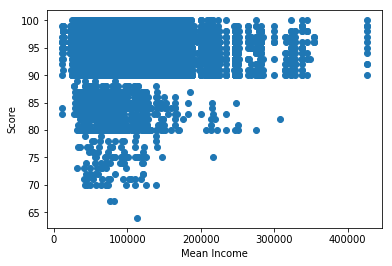

In [18]:
plt.scatter(X, y)
plt.xlabel("Mean Income")
plt.ylabel("Score")

In [36]:
LA_geo_df['Household Mean Income']=LA_geo_df['Household Mean Income'].astype(int)

ValueError: invalid literal for int() with base 10: '-'

In [20]:
from sklearn.model_selection import train_test_split

### BEGIN SOLUTION

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [42]:
X = X_test
y = y_test
X = sm.add_constant(X)
# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model
plt.savefig("OLS_Income.jpg")
# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     8.522
Date:                Wed, 20 Feb 2019   Prob (F-statistic):            0.00352
Time:                        20:47:16   Log-Likelihood:                -18495.
No. Observations:                6746   AIC:                         3.699e+04
Df Residuals:                    6744   BIC:                         3.701e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         93.6662      0.103    910.921      0.000      93.465      93.868
x1          2.997e-06   1.03e-06      2.919      0.004    9.84e-07    5.01e-06
==============================================================================
Omnibus:                     1730.417   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5948.014
Skew:                          -1.271   Prob(JB):                         0.00
Kurtosis:                       6.834   Cond. No.                     2.25e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.25e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<Figure size 432x288 with 0 Axes>

In [54]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [55]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [56]:
# Calculate the mean_squared_error and the r-squared value
# for the testing data

from sklearn.metrics import mean_squared_error, r2_score

### BEGIN SOLUTION

# Use our model to make predictions
predicted = model.predict(X_test)

# Score the predictions with mse and r2
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

### END SOLUTION

Mean Squared Error (MSE): 14.095380121874182
R-squared (R2 ): 0.0009259468561599871


In [16]:
X = LA_geo_df["Income"]
y = LA_geo_df["Score"]
X = sm.add_constant(X)
# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model
#plt.savefig("OLS_WAR.png")
# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     46.33
Date:                Wed, 20 Feb 2019   Prob (F-statistic):           1.02e-11
Time:                        19:55:08   Log-Likelihood:                -74079.
No. Observations:               26982   AIC:                         1.482e+05
Df Residuals:                   26980   BIC:                         1.482e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         93.5750      0.052   1814.842      0.000      93.474      93.676
Income      3.493e-06   5.13e-07      6.806      0.000    2.49e-06     4.5e-06
==============================================================================
Omnibus:                     7426.587   Durbin-Watson:                   1.855
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            27704.499
Skew:                          -1.345   Prob(JB):                         0.00
Kurtosis:                       7.172   Cond. No.                     2.26e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.26e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [58]:
csv_path = "povertyrate.csv"
poverty_df = pd.read_csv(csv_path)

poverty_df.head()

/anaconda3/envs/PythonData/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (37,38,49,50,67,68,163,164,169,170,211,212) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Id,Geocode,Geography,Total; Estimate; Population for whom poverty status is determined,Total; Margin of Error; Population for whom poverty status is determined,Below poverty level; Estimate; Population for whom poverty status is determined,Below poverty level; Margin of Error; Population for whom poverty status is determined,Percent_below_poverty_level,Percent below poverty level; Margin of Error; Population for whom poverty status is determined,Total; Estimate; AGE - Under 18 years,...,"Below poverty level; Estimate; Worked less than full-time, year-round in the past 12 months","Below poverty level; Margin of Error; Worked less than full-time, year-round in the past 12 months","Percent below poverty level; Estimate; Worked less than full-time, year-round in the past 12 months","Percent below poverty level; Margin of Error; Worked less than full-time, year-round in the past 12 months",Total; Estimate; Did not work,Total; Margin of Error; Did not work,Below poverty level; Estimate; Did not work,Below poverty level; Margin of Error; Did not work,Percent below poverty level; Estimate; Did not work,Percent below poverty level; Margin of Error; Did not work
0,1400000US06037101110,6037101110,"Census Tract 1011.10, Los Angeles County, Cali...",4462,396,602,254,13.5,5.5,964,...,85,52,44.5,21.6,272,97,162,75,59.6,16.2
1,1400000US06037101122,6037101122,"Census Tract 1011.22, Los Angeles County, Cali...",3056,293,96,44,3.1,1.5,326,...,0,12,0,35.5,144,58,60,39,41.7,19
2,1400000US06037101210,6037101210,"Census Tract 1012.10, Los Angeles County, Cali...",6043,536,2187,570,36.2,8.8,1431,...,112,93,43.1,30.7,548,175,428,164,78.1,12.5
3,1400000US06037101220,6037101220,"Census Tract 1012.20, Los Angeles County, Cali...",3340,312,523,192,15.7,5.5,707,...,78,50,45.6,20.9,186,61,105,50,56.5,18.7
4,1400000US06037101300,6037101300,"Census Tract 1013, Los Angeles County, California",4238,468,448,317,10.6,7.1,503,...,36,32,31,18.8,444,313,297,301,66.9,28.7


In [24]:
df_Income_Foreign = pd.merge(LA_geo_df, foreign_df, on='Geocode', how='left')

In [25]:
df_Income_Foreign.head()

,Geocode,business_id,name,address,city,state,postal_code,latitude,longitude,Score,...,Percent; COMPUTERS AND INTERNET USE - Total households,Percent Margin of Error; COMPUTERS AND INTERNET USE - Total households,Estimate; COMPUTERS AND INTERNET USE - Total households - With a computer,Margin of Error; COMPUTERS AND INTERNET USE - Total households - With a computer,Percent; COMPUTERS AND INTERNET USE - Total households - With a computer,Percent Margin of Error; COMPUTERS AND INTERNET USE - Total households - With a computer,Estimate; COMPUTERS AND INTERNET USE - Total households - With a broadband Internet subscription,Margin of Error; COMPUTERS AND INTERNET USE - Total households - With a broadband Internet subscription,Percent; COMPUTERS AND INTERNET USE - Total households - With a broadband Internet subscription,Percent Margin of Error; COMPUTERS AND INTERNET USE - Total households - With a broadband Internet subscription
0,6037123204,PR0000572,BASKIN ROBBINS,6700 LAUREL CANYON BLVD,NORTH HOLLYWOOD,CA,91606,34.192320,-118.396314,98,...,1042,(X),809,88,77.6,7,718,87,68.9,7
1,6037267901,PR0003203,AMC CENTURY CITY 15 LEVEL 3,10250 SANTA MONICA BLVD # 2000,LOS ANGELES,CA,90067,34.060036,-118.419883,99,...,1342,(X),1263,134,94.1,3.8,1123,136,83.7,5.1
2,6037190802,PR0003940,ARCLIGHT HOLLYWOOD,6360 W SUNSET BLVD,LOS ANGELES,CA,90028,34.097740,-118.327820,98,...,1338,(X),1203,104,89.9,5.1,1066,107,79.7,6.9
3,6037920312,PR0004579,BASKIN ROBBINS #3075,23432 LYONS AVE,NEWHALL,CA,91321,34.379486,-118.543167,96,...,1940,(X),1788,95,92.2,2.7,1683,101,86.8,4
4,6037302301,PR0005248,BARNES & NOBLE #2303,210 AMERICANA WAY,GLENDALE,CA,91210,34.143485,-118.256648,94,...,1470,(X),1345,81,91.5,3.4,1300,83,88.4,3.7


In [37]:
X = df_Income_Foreign["Foreign_born"].values.reshape(-1, 1)
y = df_Income_Foreign["Score"].values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

Shape:  (26982, 1) (26982, 1)


Text(0,0.5,'Score')

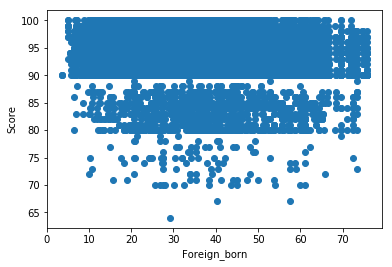

In [38]:
plt.scatter(X, y)
plt.xlabel("Foreign_born")
plt.ylabel("Score")

In [39]:
X = df_Income_Foreign["Foreign_born"]
y = df_Income_Foreign["Score"]
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     167.6
Date:                Wed, 20 Feb 2019   Prob (F-statistic):           3.29e-38
Time:                        20:40:00   Log-Likelihood:                -74018.
No. Observations:               26982   AIC:                         1.480e+05
Df Residuals:                   26980   BIC:                         1.481e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           94.6266      0.061   1541.575      0.000      94.506      94.747
Foreign_born    -0.0213      0.002    -12.944      0.000      -0.024      -0.018
==============================================================================
Omnibus:                     7389.528   Durbin-Watson:                   1.858
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            27531.735
Skew:                          -1.338   Prob(JB):                         0.00
Kurtosis:                       7.162   Cond. No.                         100.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
X = df_Income_Foreign[["Income","Foreign_born"]]
y = df_Income_Foreign["Score"]
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     84.05
Date:                Wed, 20 Feb 2019   Prob (F-statistic):           4.08e-37
Time:                        20:40:08   Log-Likelihood:                -74018.
No. Observations:               26982   AIC:                         1.480e+05
Df Residuals:                   26979   BIC:                         1.481e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           94.5649      0.103    913.939      0.000      94.362      94.768
Income        4.317e-07   5.83e-07      0.741      0.459    -7.1e-07    1.57e-06
Foreign_born    -0.0206      0.002    -11.026      0.000      -0.024      -0.017
==============================================================================
Omnibus:                     7387.547   Durbin-Watson:                   1.858
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            27515.069
Skew:                          -1.338   Prob(JB):                         0.00
Kurtosis:                       7.161   Cond. No.                     4.54e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.54e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
csv_path = "foreign_population.csv"
foreign_df = pd.read_csv(csv_path)

foreign_df.head()

/anaconda3/envs/PythonData/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (101,102,105,106,109,110,113,114,117,118,125,126,129,130,133,134,137,138,141,142,151,152,155,156,163,164,213,214,217,218,221,222,225,226,229,230,237,238,241,242,245,246,249,250,253,254,257,258,261,262,265,266,269,270,285,286,293,294,301,302,377,378,381,382,405,406,409,410,417,418,421,422,425,426,429,430,433,434,437,438) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Id,Geocode,Geography,Estimate; HOUSEHOLDS BY TYPE - Total households,Margin of Error; HOUSEHOLDS BY TYPE - Total households,Percent; HOUSEHOLDS BY TYPE - Total households,Percent Margin of Error; HOUSEHOLDS BY TYPE - Total households,Estimate; HOUSEHOLDS BY TYPE - Total households - Family households (families),Margin of Error; HOUSEHOLDS BY TYPE - Total households - Family households (families),Percent; HOUSEHOLDS BY TYPE - Total households - Family households (families),...,Percent; COMPUTERS AND INTERNET USE - Total households,Percent Margin of Error; COMPUTERS AND INTERNET USE - Total households,Estimate; COMPUTERS AND INTERNET USE - Total households - With a computer,Margin of Error; COMPUTERS AND INTERNET USE - Total households - With a computer,Percent; COMPUTERS AND INTERNET USE - Total households - With a computer,Percent Margin of Error; COMPUTERS AND INTERNET USE - Total households - With a computer,Estimate; COMPUTERS AND INTERNET USE - Total households - With a broadband Internet subscription,Margin of Error; COMPUTERS AND INTERNET USE - Total households - With a broadband Internet subscription,Percent; COMPUTERS AND INTERNET USE - Total households - With a broadband Internet subscription,Percent Margin of Error; COMPUTERS AND INTERNET USE - Total households - With a broadband Internet subscription
0,1400000US06037101110,6037101110,"Census Tract 1011.10, Los Angeles County, Cali...",1617,72,1617,(X),1075,130,66.5,...,1617,(X),1399,106,86.5,5.2,1146,126,70.9,7.1
1,1400000US06037101122,6037101122,"Census Tract 1011.22, Los Angeles County, Cali...",1217,81,1217,(X),866,105,71.2,...,1217,(X),1122,88,92.2,4.2,991,112,81.4,6.4
2,1400000US06037101210,6037101210,"Census Tract 1012.10, Los Angeles County, Cali...",2330,81,2330,(X),1428,159,61.3,...,2330,(X),1973,168,84.7,6.3,1648,215,70.7,8.7
3,1400000US06037101220,6037101220,"Census Tract 1012.20, Los Angeles County, Cali...",1257,61,1257,(X),804,98,64,...,1257,(X),949,108,75.5,7.3,863,117,68.7,8.2
4,1400000US06037101300,6037101300,"Census Tract 1013, Los Angeles County, California",1447,70,1447,(X),1049,100,72.5,...,1447,(X),1223,92,84.5,5.5,1127,107,77.9,6.6


In [62]:
df_all = pd.merge(df_inc_pov, foreign_df, on='Geocode', how='left')

In [63]:
df_all.head()

,Geocode,business_id,name,address,city,state,postal_code,latitude,longitude,Score,...,Percent; COMPUTERS AND INTERNET USE - Total households,Percent Margin of Error; COMPUTERS AND INTERNET USE - Total households,Estimate; COMPUTERS AND INTERNET USE - Total households - With a computer,Margin of Error; COMPUTERS AND INTERNET USE - Total households - With a computer,Percent; COMPUTERS AND INTERNET USE - Total households - With a computer,Percent Margin of Error; COMPUTERS AND INTERNET USE - Total households - With a computer,Estimate; COMPUTERS AND INTERNET USE - Total households - With a broadband Internet subscription,Margin of Error; COMPUTERS AND INTERNET USE - Total households - With a broadband Internet subscription,Percent; COMPUTERS AND INTERNET USE - Total households - With a broadband Internet subscription,Percent Margin of Error; COMPUTERS AND INTERNET USE - Total households - With a broadband Internet subscription
0,6037123204,PR0000572,BASKIN ROBBINS,6700 LAUREL CANYON BLVD,NORTH HOLLYWOOD,CA,91606,34.192320,-118.396314,98,...,1042,(X),809,88,77.6,7,718,87,68.9,7
1,6037267901,PR0003203,AMC CENTURY CITY 15 LEVEL 3,10250 SANTA MONICA BLVD # 2000,LOS ANGELES,CA,90067,34.060036,-118.419883,99,...,1342,(X),1263,134,94.1,3.8,1123,136,83.7,5.1
2,6037190802,PR0003940,ARCLIGHT HOLLYWOOD,6360 W SUNSET BLVD,LOS ANGELES,CA,90028,34.097740,-118.327820,98,...,1338,(X),1203,104,89.9,5.1,1066,107,79.7,6.9
3,6037920312,PR0004579,BASKIN ROBBINS #3075,23432 LYONS AVE,NEWHALL,CA,91321,34.379486,-118.543167,96,...,1940,(X),1788,95,92.2,2.7,1683,101,86.8,4
4,6037302301,PR0005248,BARNES & NOBLE #2303,210 AMERICANA WAY,GLENDALE,CA,91210,34.143485,-118.256648,94,...,1470,(X),1345,81,91.5,3.4,1300,83,88.4,3.7


In [64]:
X = df_all["Foreign_born"].values.reshape(-1, 1)
y = df_all["Score"].values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

Shape:  (26982, 1) (26982, 1)


Text(0,0.5,'Score')

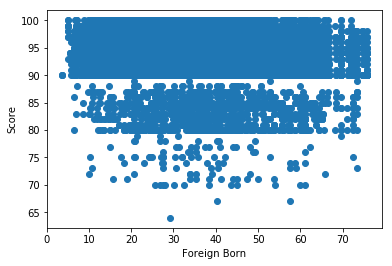

In [65]:
plt.scatter(X, y)
plt.xlabel("Foreign Born")
plt.ylabel("Score")
### END SOLUTION